# 1. Data Import

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 2. Data Discovery and Cleaning

## 2.1 Data Overview

In [73]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [74]:
train_data.shape

(8693, 14)

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [76]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [77]:
# set up x and y labels
X_train = train_data.drop('Transported', axis=1)
y_train = train_data['Transported'].copy()
X_test = test_data.copy()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='RoomService', ylabel='Age'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='Age'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='Age'>,
        <AxesSubplot:xlabel='Spa', ylabel='Age'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='RoomService'>,
        <AxesSubplot:xlabel='RoomService', ylabel='RoomService'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='RoomService'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='RoomService'>,
        <AxesSubplot:xlabel='Spa', ylabel='RoomService'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='RoomService'>],
       [<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='Spa', ylabel='FoodCour

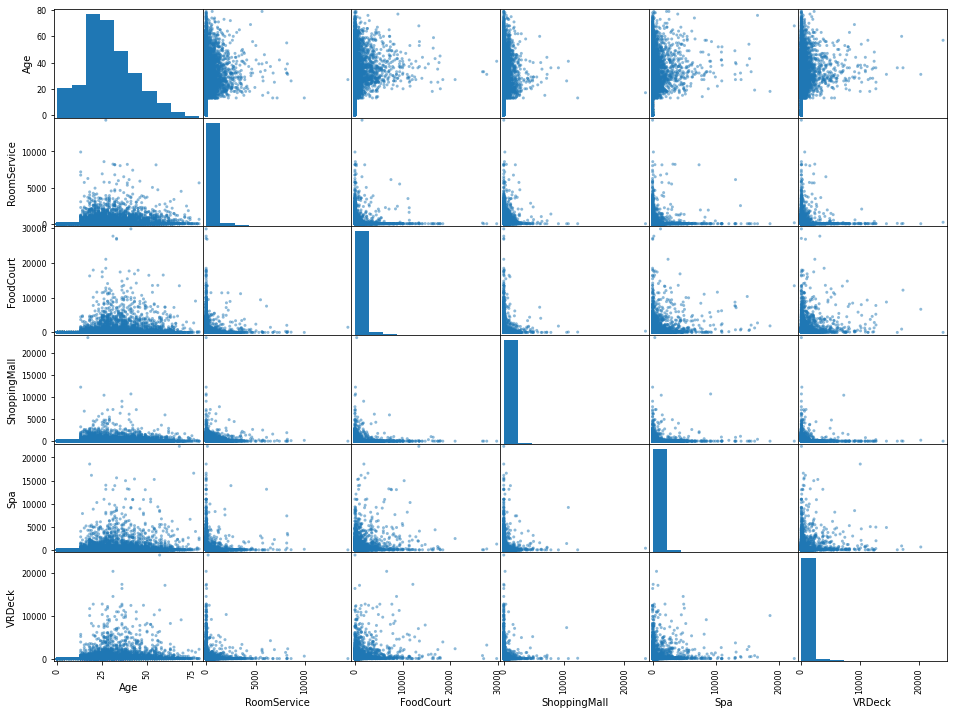

In [116]:
from pandas.plotting import scatter_matrix

attributes = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scatter_matrix(train_data[attributes], figsize=(16, 12))

## 2.2 Add New Columns

Label each passenger with their group number, split up cabin number, and drop the names

In [78]:
# group number based on passenger ID
X_train['Group'] = X_train.PassengerId.str.split('_',expand=True)[0]
X_test['Group'] = X_test.PassengerId.str.split('_',expand=True)[0]
# split up room information
X_train[['Deck', 'Num', 'Side']] = X_train.Cabin.str.split('/', expand=True)
X_test[['Deck', 'Num', 'Side']] = X_test.Cabin.str.split('/', expand=True)
X_train = X_train.drop('Name', axis=1)
X_test = X_test.drop('Name', axis=1)

## 2.3 Fix Missing Data

Look for missing data

In [79]:
# check to see if there's any missing value in the train data with .isnull()
train_incomplete_rows = train_data[train_data.isnull().any(axis=1)]
train_incomplete_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [80]:
# see what data points are missing in train_data
count = (train_data.isna()).sum()
print(count)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [81]:
# check to see if there's any missing value in the test data with .isnull()
test_incomplete_rows = test_data[test_data.isnull().any(axis=1)]
test_incomplete_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4267,9260_01,Earth,True,G/1503/P,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [82]:
# see what data points are missing in test_data
count = (test_data.isna()).sum()
print(count)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


Check distribution of expenses (RoomService, FoodCourt, ShoppingMall, VRDeck) to see what metric to use to replace missing values

In [83]:
expenses = train_data.copy()
expenses[expenses == 0] = np.nan

c:\Users\Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoomService'>

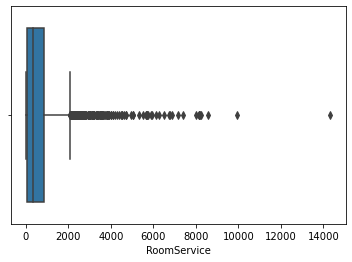

In [84]:
sns.boxplot(expenses['RoomService'])

c:\Users\Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FoodCourt'>

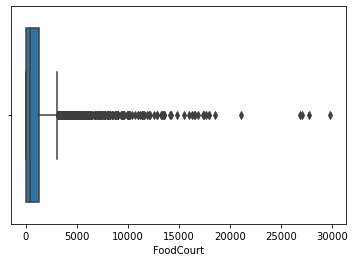

In [85]:
sns.boxplot(expenses['FoodCourt'])

c:\Users\Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShoppingMall'>

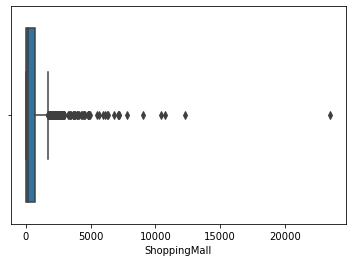

In [86]:
sns.boxplot(expenses['ShoppingMall'])

c:\Users\Student\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VRDeck'>

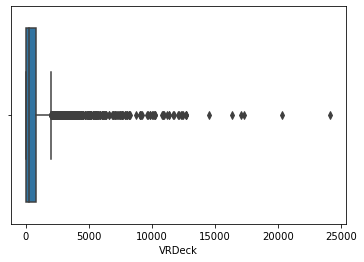

In [87]:
sns.boxplot(expenses['VRDeck'])

We will use the median for all expenses because it is a better representation of the spending. If the passenger was in cryosleep or under 12, set their missing expenses to 0. Else, set their expense to the median of those who spent money on that expense. If cryosleep is missing, set to True if all expenses is 0. Set to false otherwise.

In [88]:
# set expenses to 0 if cryosleep == True
X_train.loc[X_train['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
X_test.loc[X_test['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

# set expenses to 0 if age <= 12
X_train.loc[X_train['Age'] <= 12,  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
X_test.loc[X_test['Age'] <= 12,  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

# set expenses to the median of the population expense
X_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
X_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] \
.fillna(expenses[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median())

X_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
X_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] \
.fillna(expenses[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median())

# if any expense != 0, cryosleep = False
# else = True 
X_train.loc[(X_train['RoomService'] == 0) & (X_train['FoodCourt'] == 0) \
& (X_train['ShoppingMall'] == 0) & (X_train['Spa'] == 0) \
& (X_train['VRDeck'] == 0),  ['CryoSleep']] = True
X_train.loc[(X_train['RoomService'] != 0) | (X_train['FoodCourt'] != 0) \
| (X_train['ShoppingMall'] != 0) | (X_train['Spa'] != 0) \
& (X_train['VRDeck'] != 0),  ['CryoSleep']] = False

X_test.loc[(X_test['RoomService'] == 0) & (X_test['FoodCourt'] == 0) \
& (X_test['ShoppingMall'] == 0) & (X_test['Spa'] == 0) \
& (X_test['VRDeck'] == 0),  ['CryoSleep']] = True
X_test.loc[(X_test['RoomService'] != 0) | (X_test['FoodCourt'] != 0) \
| (X_test['ShoppingMall'] != 0) | (X_test['Spa'] != 0) \
& (X_test['VRDeck'] != 0),  ['CryoSleep']] = False

We will assume that those in the same group are from the same home planet and are in the same cabin

In [89]:
# set home planet to that of others in the same group
group_planet_dict = dict(zip(X_train['Group'], X_train['HomePlanet']))
X_train.loc[X_train['HomePlanet'].isnull(), 'HomePlanet'] = X_train['Group'].apply(lambda x: group_planet_dict.get(x))
X_test.loc[X_test['HomePlanet'].isnull(), 'HomePlanet'] = X_test['Group'].apply(lambda x: group_planet_dict.get(x))

# set cabin to equal others in same group
group_cabin_dict = dict(zip(X_train['Group'], X_train['Cabin']))
X_train.loc[X_train['Cabin'].isnull(), 'Cabin'] = X_train['Group'].apply(lambda x: group_cabin_dict.get(x))
X_test.loc[X_test['Cabin'].isnull(), 'Cabin'] = X_test['Group'].apply(lambda x: group_cabin_dict.get(x))

# update deck num and side column
X_train[['Deck', 'Num', 'Side']] = X_train.Cabin.str.split('/', expand=True)
X_test[['Deck', 'Num', 'Side']] = X_test.Cabin.str.split('/', expand=True)

Drop cabin, passengerID, group, room number, and room side

In [90]:
X_train = X_train.drop('Cabin', axis=1)
X_test = X_test.drop('Cabin', axis=1)
X_train = X_train.drop('PassengerId', axis=1)
X_test = X_test.drop('PassengerId', axis=1)
X_train = X_train.drop('Group', axis=1)
X_test = X_test.drop('Group', axis=1)
X_train = X_train.drop('Num', axis=1)
X_test = X_test.drop('Num', axis=1)
X_train = X_train.drop('Side', axis=1)
X_test = X_test.drop('Side', axis=1)

Replace all other missing values with median or most common value

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

frequency_attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck']
median_attributes = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', ]

imputer_pipeline = ColumnTransformer(transformers=[
            ('most_freq_imputer', SimpleImputer(strategy='most_frequent'), frequency_attributes),            
            ('median_imputer', SimpleImputer(strategy='median'), median_attributes),
        ])
all_attributes = frequency_attributes + median_attributes

X_test.replace(to_replace=[None], value=np.nan, inplace=True)

imputer = imputer_pipeline
X_train_imput = imputer.fit_transform(X_train)
X_test_imput = imputer.fit_transform(X_test)
X_train_imput = pd.DataFrame(X_train_imput, columns = all_attributes, index=X_train.index)
X_test_imput = pd.DataFrame(X_test_imput, columns = all_attributes, index=X_test.index)

Make sure there are no more missing values

In [92]:
# missing values in train_data
count = (X_train_imput.isna()).sum()
print(count)

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Deck            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [93]:
# missing values in test_data
count = (X_test_imput.isna()).sum()
print(count)

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Deck            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


## 2.4 Scale Numeric Data and Label Categorical Data

Use standard scalar to standardize the numeric data and one hot encoding to label the categorical data with numbers

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_attributes = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'RoomService', 'VRDeck']
cat_attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck']

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", cat_pipeline, cat_attributes),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train_imput)
X_test_prepared = full_pipeline.fit_transform(X_test_imput)

# 3 Use SKLearn Stochastic Gradient Descent Regressor Model

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

mySGDModel = SGDRegressor()
# fit the SGD model to the train data
mySGDModel.fit(X_train_prepared, y_train)
# make predictions on the test data
y_predict_percent = mySGDModel.predict(X_test_prepared)

Create output csv for submission

In [136]:
y_predict = np.round(y_predict_percent)
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': y_predict.astype(bool)})
submission.to_csv('submission.csv', index=False)